**TITANIC PROJECT - BHARAT INTERN**

**Introduction** - The Titanic disaster in 1912 led to significant loss of life and spurred improved safety regulations for ships. Some groups of people had a higher chance of surviving, and the challenge is to create a predictive model using passenger data to determine who was more likely to survive.

STEPS INVOLVED :
1. Importing the necessary libraries
2. Data Loading
3. Exploratory Data Analysis (EDA)
4. Feature Engineering and Data Processing
5. Model Evaluation

# 1. Importing the necessary libraries

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



# 2.Data Loading

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')


In [115]:
# Set the option to display all columns without truncation
pd.set_option('display.max_columns', None)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 # 3.Exploratory Data Analysis (EDA)
 Exploratory Data Analysis (EDA) is the initial step in data analysis. It involves summarizing and visualizing data to understand its characteristics, identify patterns, and detect anomalies. For the Titanic dataset, you would check data structure, compute summary statistics, and create visualizations to gain insights into passenger information.

In [117]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The training set reveals that 38% of passengers survived the Titanic, and the age range spans from 0.4 to 80 years old.

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the dataset, there are 177 missing values in the 'Age' column, 2 missing values in the 'Embarked' column, and 687 missing values in the 'Cabin' column. These missing values will need to be addressed during the data preprocessing phase.

In [120]:
train.shape

(891, 12)

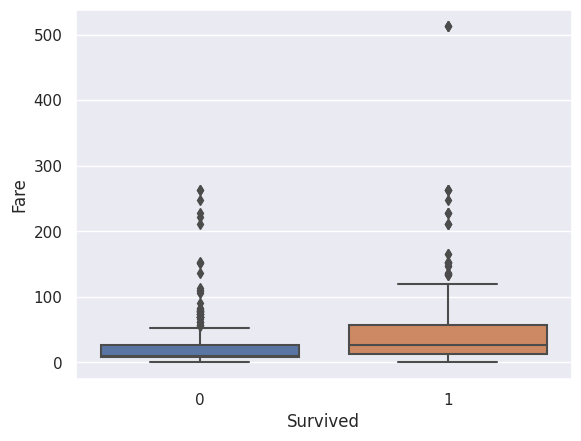

In [121]:
# Dealing with the outlier
sns.boxplot(x='Survived',y='Fare',data=train);

Passengers who paid over 300


In [122]:
train[train['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


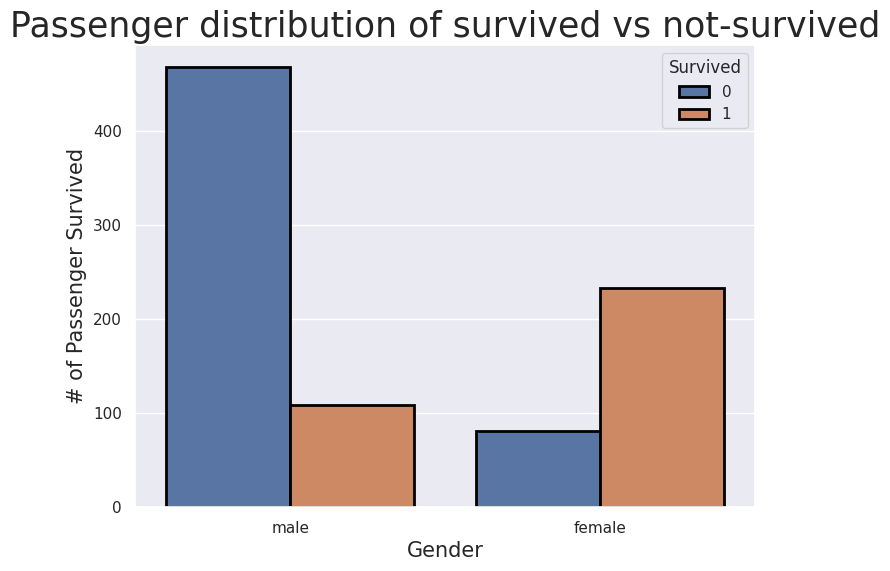

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='Sex', data=train, hue='Survived', edgecolor=(0, 0, 0), linewidth=2)

# Fixing title, xlabel, and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize=15)
labels = ['Female', 'Male']




Text(0.5, 1.0, 'Count of Passengers by sex')

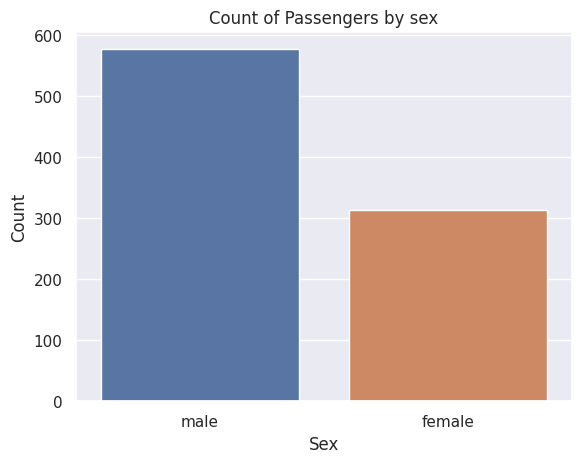

In [124]:
sns.countplot(data=train, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Passengers by sex')

We observe more males than females

0 indicates that the passenger is travelling solo.



<ipython-input-125-d3362e73621e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

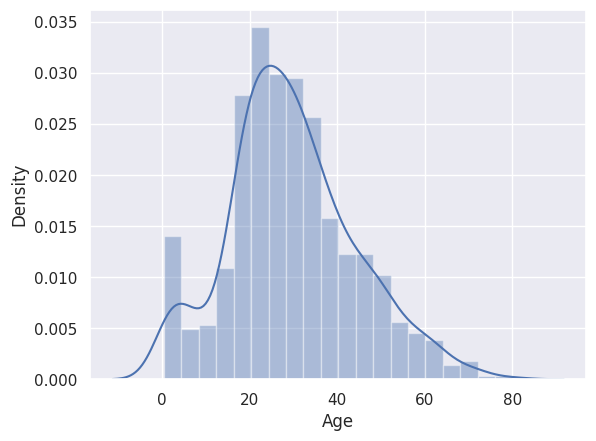

In [125]:
# numerical attributes
sns.distplot(train['Age'])

The graph shows a bell curve indicating a normal distribution.

<ipython-input-126-98b78f01c2eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

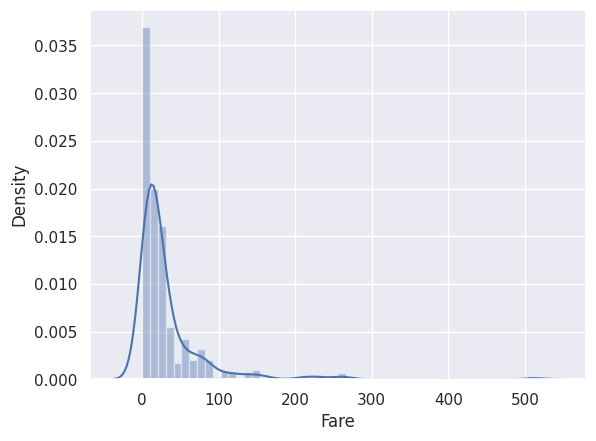

In [126]:
sns.distplot(train['Fare'])

The graph is right right-skewed curve convert into normal distribution

In [127]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Pclass', ylabel='Fare'>

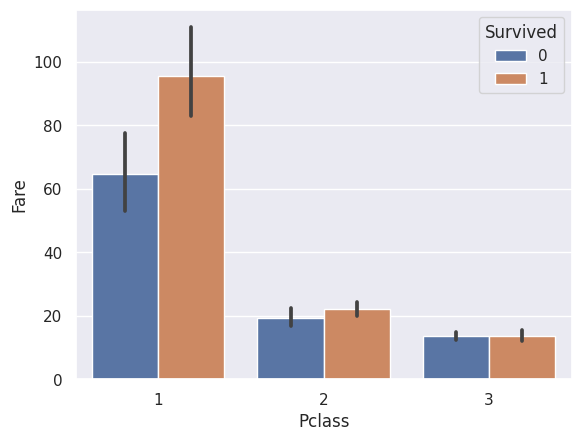

In [128]:
sns.barplot(data=train, x='Pclass', y='Fare',hue = 'Survived')

This plot has a comparison of survived passengers depending on the ticket fare and passenger class

In [129]:
# Data Preprocessing
# We now combine the train and test datasets.
import pandas as pd
df = pd.concat([train, test], axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 4.Feature Engineering and Data Processing  


<ipython-input-131-9eeb8447d05c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

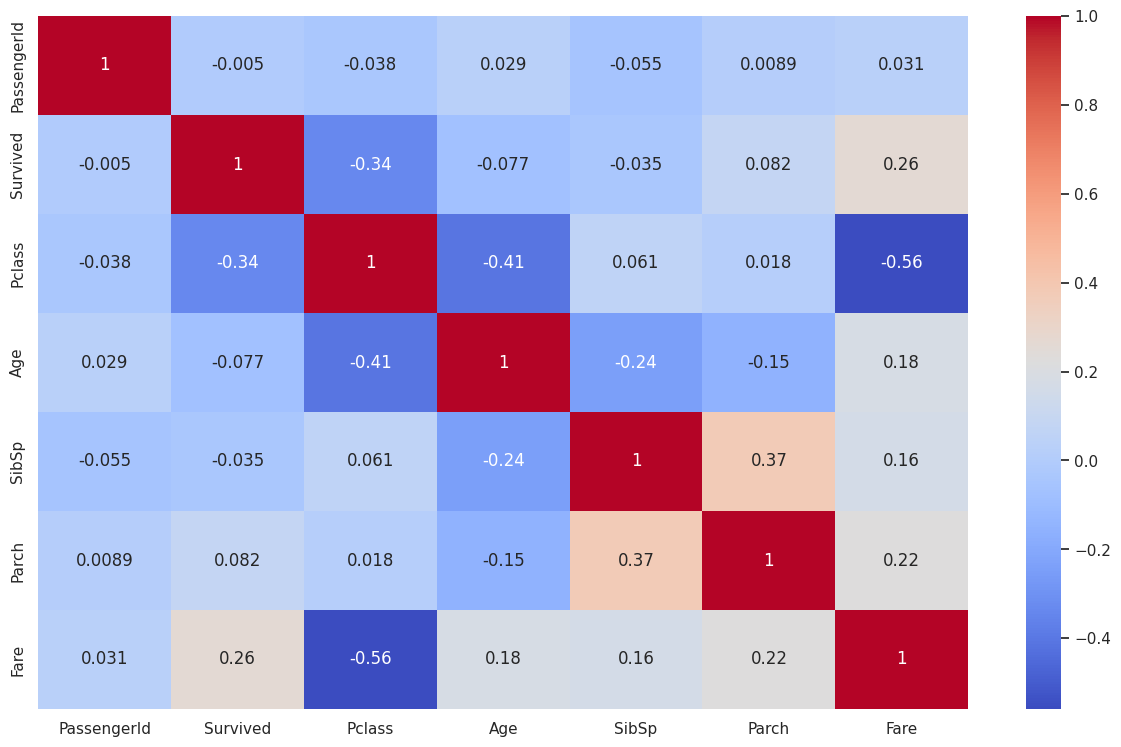

In [131]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Pclass is not much important so we can drop this column

In [132]:
df =df.drop(columns=['Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


Survived column are from test data so we can avoid this null value.



In [133]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [134]:
# we need to fill the missing value
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [135]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [136]:
df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [137]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

So Now there is not any null value.

<ipython-input-138-3bad30217e11>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


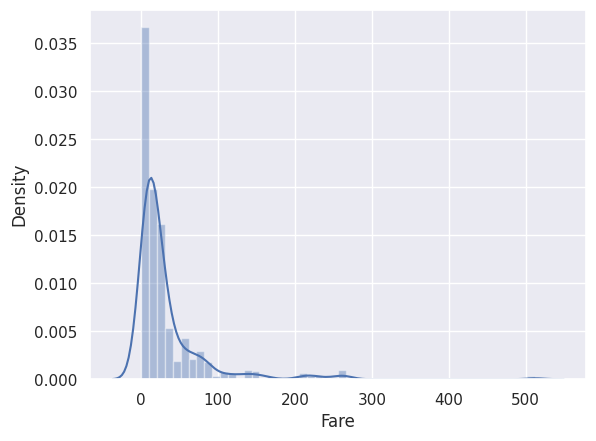

In [138]:
# Log transformation for Normal data distribution
# We have to normalize the column 'Fare'.
sns.distplot(df['Fare'])
df['Fare']=np.log(df['Fare']+1)

In [139]:
df['Fare'] = np.log(df['Fare']+1)

<ipython-input-140-70b4b4beb1b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

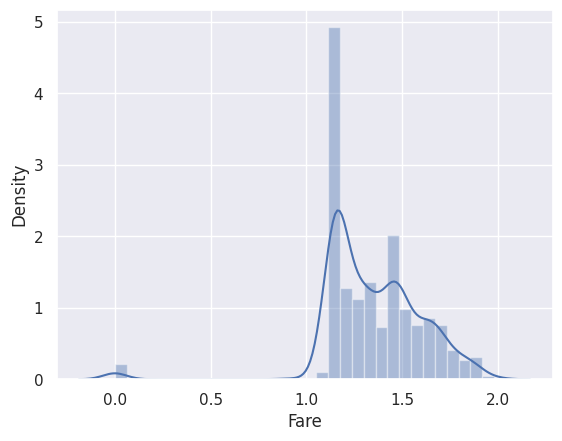

In [140]:
sns.distplot(df['Fare'])

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.134691,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1.664038,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.159662,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1.607603,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.164014,S


In [142]:
# name and ticket column are not much import column so we can drop these columns.

df = df.drop(columns = ['Name','Ticket'], axis=0)

In [143]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,1.134691,S
1,2,1.0,1,female,38.0,1,0,1.664038,C
2,3,1.0,3,female,26.0,0,0,1.159662,S
3,4,1.0,1,female,35.0,1,0,1.607603,S
4,5,0.0,3,male,35.0,0,0,1.164014,S


In [144]:
# now apply encoder
from sklearn.preprocessing import LabelEncoder

cols = ['Sex', 'Embarked']
encoder = LabelEncoder()
for col in cols:
    df[col] = encoder.fit_transform(df[col])


In [145]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


In [146]:
# train-test-split
train = df.iloc[:len(train), :]
test = df.iloc[len(train):, :]


In [147]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.134691,2
1,2,1.0,1,0,38.0,1,0,1.664038,0
2,3,1.0,3,0,26.0,0,0,1.159662,2
3,4,1.0,1,0,35.0,1,0,1.607603,2
4,5,0.0,3,1,35.0,0,0,1.164014,2


In [148]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,3,1,34.5,0,0,1.156272,1
1,893,NaN,3,0,47.0,1,0,1.124748,2
2,894,NaN,2,1,62.0,0,0,1.214638,1
3,895,NaN,3,1,27.0,0,0,1.184255,2
4,896,NaN,3,0,22.0,1,1,1.277267,2


In [149]:
x = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [150]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,1.134691,2
1,1,0,38.0,1,0,1.664038,0
2,3,0,26.0,0,0,1.159662,2
3,1,0,35.0,1,0,1.607603,2
4,3,1,35.0,0,0,1.164014,2


In [151]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

# 5.Model Evaluation

In [152]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

a)LogisticRegression

In [153]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

Y_pred = log.predict(x_test)

acc_log = round(log.score(x_train, y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

81.7 %


b)KNeighborsClassifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

# Print score
print(round(acc_knn,2,), "%")

89.73 %


c)RandomForestClassifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

# Print score
print(round(acc_random_forest,2,), "%")

98.88 %


In [156]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest'],
    'Score': [acc_knn, acc_log,
              acc_random_forest]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.88,Random Forest
89.73,KNN
81.70,Logistic Regression



**RESULT**-
These accuracy scores represent the performance of each model in correctly predicting the target variable, and the higher the score, the better the model's predictive capabilities. In this case, the Random Forest model performed the best with the highest accuracy score, followed by KNN and Logistic Regression.